In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
dataset = pd.read_csv('./dataset/train.csv')
dataset.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,0,...,1,12.0,5,-6,48,1022,-5,5.0,0.0,46


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523021 entries, 0 to 523020
Data columns (total 36 columns):
StoreID                       523021 non-null int64
Date                          523021 non-null object
IsHoliday                     523021 non-null int64
IsOpen                        523021 non-null int64
HasPromotions                 523021 non-null int64
StoreType                     523021 non-null object
AssortmentType                523021 non-null object
NearestCompetitor             523021 non-null int64
Region                        523021 non-null int64
NumberOfCustomers             523021 non-null int64
NumberOfSales                 523021 non-null int64
Region_AreaKM2                523021 non-null int64
Region_GDP                    523021 non-null int64
Region_PopulationK            523021 non-null int64
CloudCover                    481840 non-null float64
Events                        398923 non-null object
Max_Dew_PointC                523021 non-null int64

 This is PCA considering only Attributes 'IsHoliday','HasPromotions','NearestCompetitor','NumberOfCustomers','Region','Region_PopulationK',
'Region_GDP','Region_AreaKM2' to analyze their impact by reducing the number of dimensions from 7 to 2 principal components. 
 The attributes are firstly normalized then PCA is performed and plotted into a two-dimensional graph were the two 
 principal components represent a combination of the 7 input attributes to produce the two main relevant directions. 


In [4]:
from sklearn.preprocessing import StandardScaler
features = ['IsHoliday','HasPromotions','NearestCompetitor','Region','Region_PopulationK',
            'Region_GDP','Region_AreaKM2',]
# Separating out the features
x = dataset.loc[:, features].values
# Separating out the target
y = dataset.loc[:,['NumberOfSales']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
df=pd.DataFrame(x)
df

,0,1,2,3,4,5,6
0,-0.175008,-0.788362,-0.665359,0.383312,-0.387515,1.117597,-0.299569
1,-0.175008,-0.788362,-0.665359,0.383312,-0.387515,1.117597,-0.299569
2,-0.175008,-0.788362,-0.665359,0.383312,-0.387515,1.117597,-0.299569
3,-0.175008,-0.788362,-0.665359,0.383312,-0.387515,1.117597,-0.299569
4,-0.175008,-0.788362,-0.665359,0.383312,-0.387515,1.117597,-0.299569
5,-0.175008,1.268453,-0.665359,0.383312,-0.387515,1.117597,-0.299569
6,-0.175008,1.268453,-0.665359,0.383312,-0.387515,1.117597,-0.299569
7,-0.175008,1.268453,-0.665359,0.383312,-0.387515,1.117597,-0.299569
8,-0.175008,1.268453,-0.665359,0.383312,-0.387515,1.117597,-0.299569
9,-0.175008,1.268453,-0.665359,0.383312,-0.387515,1.117597,-0.299569


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
finalDf = pd.concat([principalDf, dataset[['NumberOfSales']]], axis = 1)

The graph below represents the PCA with NumberOfSales as target variable, the 3-range domain allows to see how the number of sales are distributed along the two main directions considering their amount. 

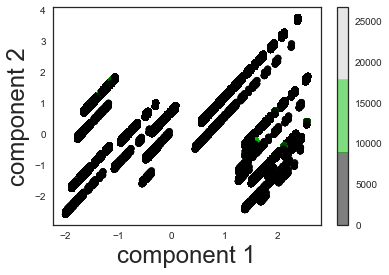

In [7]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c=dataset.NumberOfSales, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [8]:
pca.explained_variance_ratio_

array([0.29097148, 0.15710125])

 This shows the variance of the two principal components, considering that the sum of them is arounf 0.44 
 we can conclude that the two principal components together contain the 44% of the information 
 contained by the original 6 attributes, this suggests us that they cannot be merged in 2 components. 
 This result was expectd because I used attributes that should be very relevant for the analysis. 